In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("../outputs/clean_houses.csv")

In [3]:
data.rename(columns={"Unnamed: 0":"index"},inplace=True)
data.head()

,index,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
0,0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [4]:
# Para realizar nuestra predicción necesitamos que todos nuestros datos sean numéricos.
# Vamos a comprobar por tanto que tipos de datos tenemos.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17398 entries, 0 to 17397
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               17398 non-null  int64  
 1   neighborhood_id     17398 non-null  object 
 2   house_type_id       17398 non-null  object 
 3   is_renewal_needed   17398 non-null  bool   
 4   is_new_development  17398 non-null  bool   
 5   sq_mt_built         17398 non-null  float64
 6   n_rooms             17398 non-null  int64  
 7   n_bathrooms         17398 non-null  float64
 8   floor               17398 non-null  object 
 9   is_exterior         17398 non-null  bool   
 10  has_lift            17398 non-null  bool   
 11  has_parking         17398 non-null  bool   
 12  has_storage_room    17398 non-null  bool   
 13  has_terrace         17398 non-null  bool   
 14  has_balcony         17398 non-null  bool   
 15  has_pool            17398 non-null  bool   
 16  buy_

In [5]:
carac = pd.DataFrame(data.buy_price.describe())

carac

,buy_price
count,1.739800e+04
mean,5.660945e+05
std,6.148399e+05
min,3.600000e+04
25%,1.989685e+05
50%,3.600000e+05
75%,6.750000e+05
max,8.800000e+06


In [6]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data[column] = le.fit_transform(data[column])
    return data[column]

In [7]:
# Transformamos ahora todas las columnas type object y bool a float64, excepto floor.

transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

0        0
1        0
2        0
3        0
4        1
        ..
17393    1
17394    1
17395    0
17396    1
17397    1
Name: has_pool, Length: 17398, dtype: int64

In [8]:
# Aplicamos ahora get_dummies a la columna floor.

data = pd.get_dummies(data, columns = ["floor"])

In [9]:
data.columns

Index(['index', 'neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude', 'floor_1', 'floor_2',
       'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
       'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior'],
      dtype='object')

In [10]:
# Vamos a ordenar ahora las columnas y nos deshacemos de la columna neighborhood.

data = data[['index', 'house_type_id', 'is_renewal_needed',
        'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
        'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
        'has_terrace', 'has_balcony', 'has_pool',
        'latitude', 'longitude', 'floor_1', 'floor_2',
        'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
        'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
        'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
        'floor_Semi-sótano interior', 'floor_Sótano exterior',
        'floor_Sótano interior', 'buy_price']]

In [11]:
data.set_index("index", inplace=True)
data.head()

,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,is_exterior,has_lift,has_parking,has_storage_room,...,floor_8,floor_9,floor_Bajo,floor_Entreplanta exterior,floor_Entreplanta interior,floor_Semi-sótano exterior,floor_Semi-sótano interior,floor_Sótano exterior,floor_Sótano interior,buy_price
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,64.0,2,1.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,85000
1,0,1,0,70.0,3,1.0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,129900
2,0,0,0,94.0,2,2.0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,144247
3,0,0,0,64.0,2,1.0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,109900
4,0,0,0,108.0,2,2.0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,260000


In [12]:
# Vamos a realizar un análisis de los datos, como tenemos muchas columnas, vamos a dividir el data frame
# en varios dataframes para compararlos con nuestro groundtruth y ver así que relación tienen.

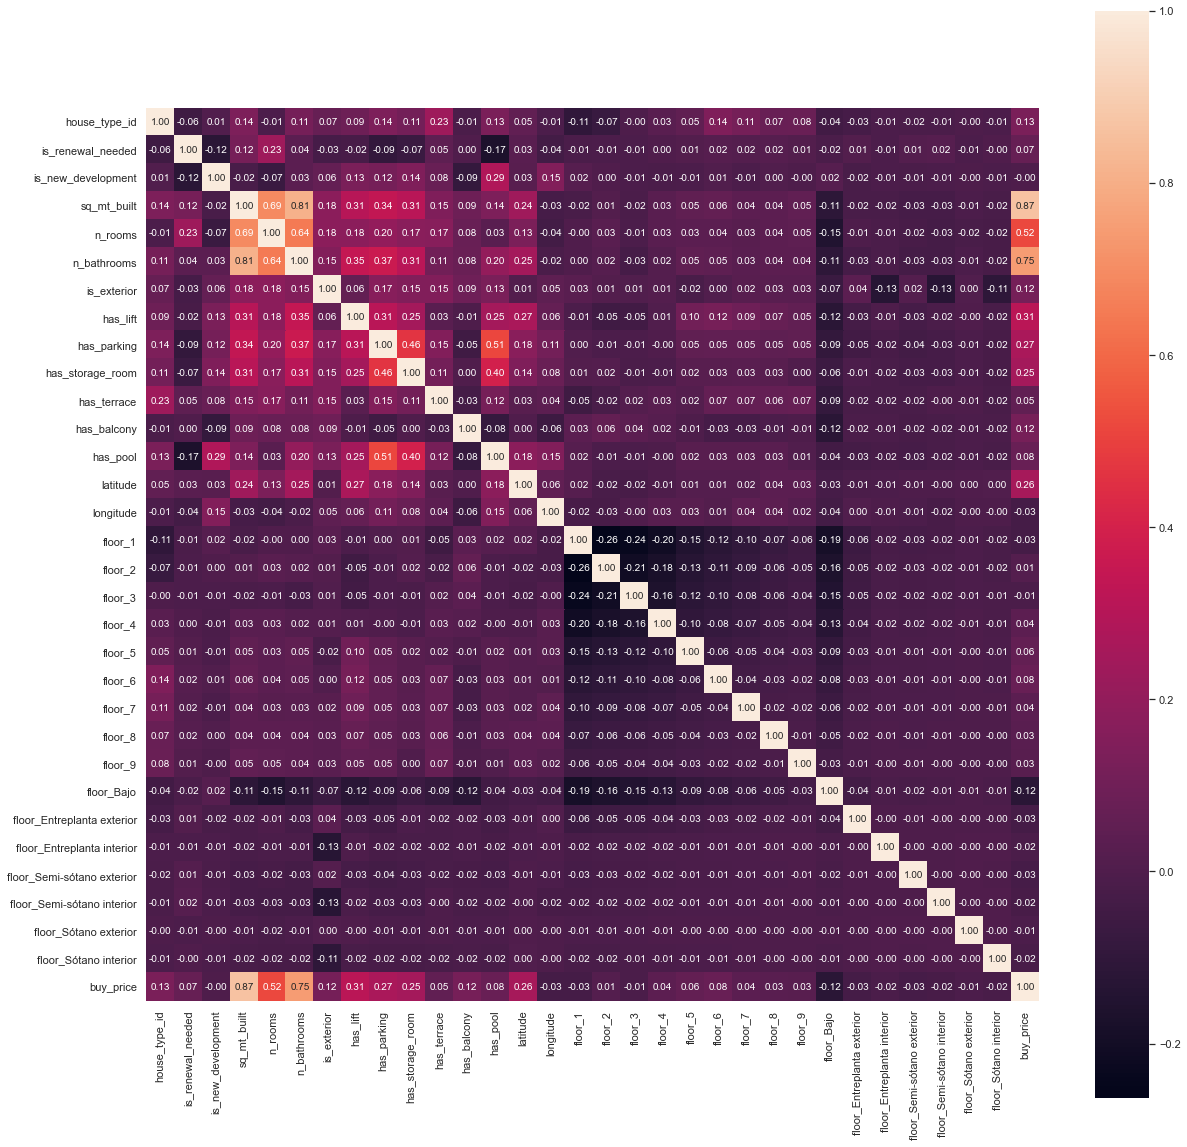

In [13]:
# Heatmap.

cm = np.corrcoef(data.values.T)
sns.set(font_scale=1)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 10},
                yticklabels=data.columns,
                xticklabels=data.columns)        

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


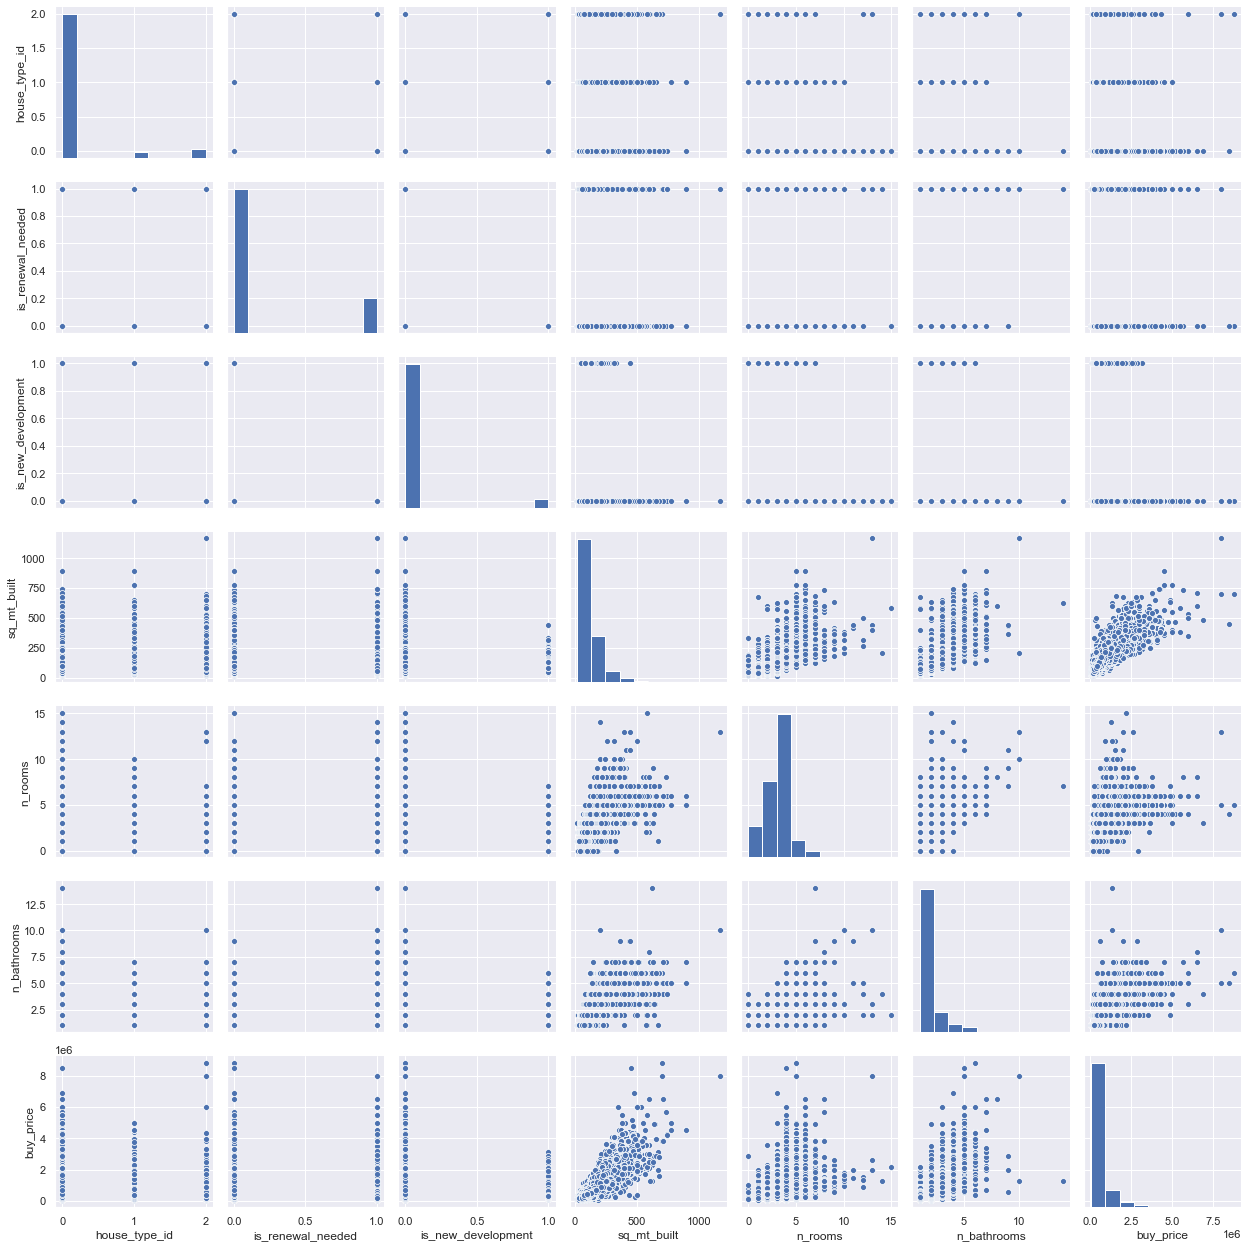

In [14]:
# Calculate and show pairplot

d_analysis1 = data[["house_type_id", "is_renewal_needed", "is_new_development","sq_mt_built", "n_rooms",
                    "n_bathrooms", 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis1)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


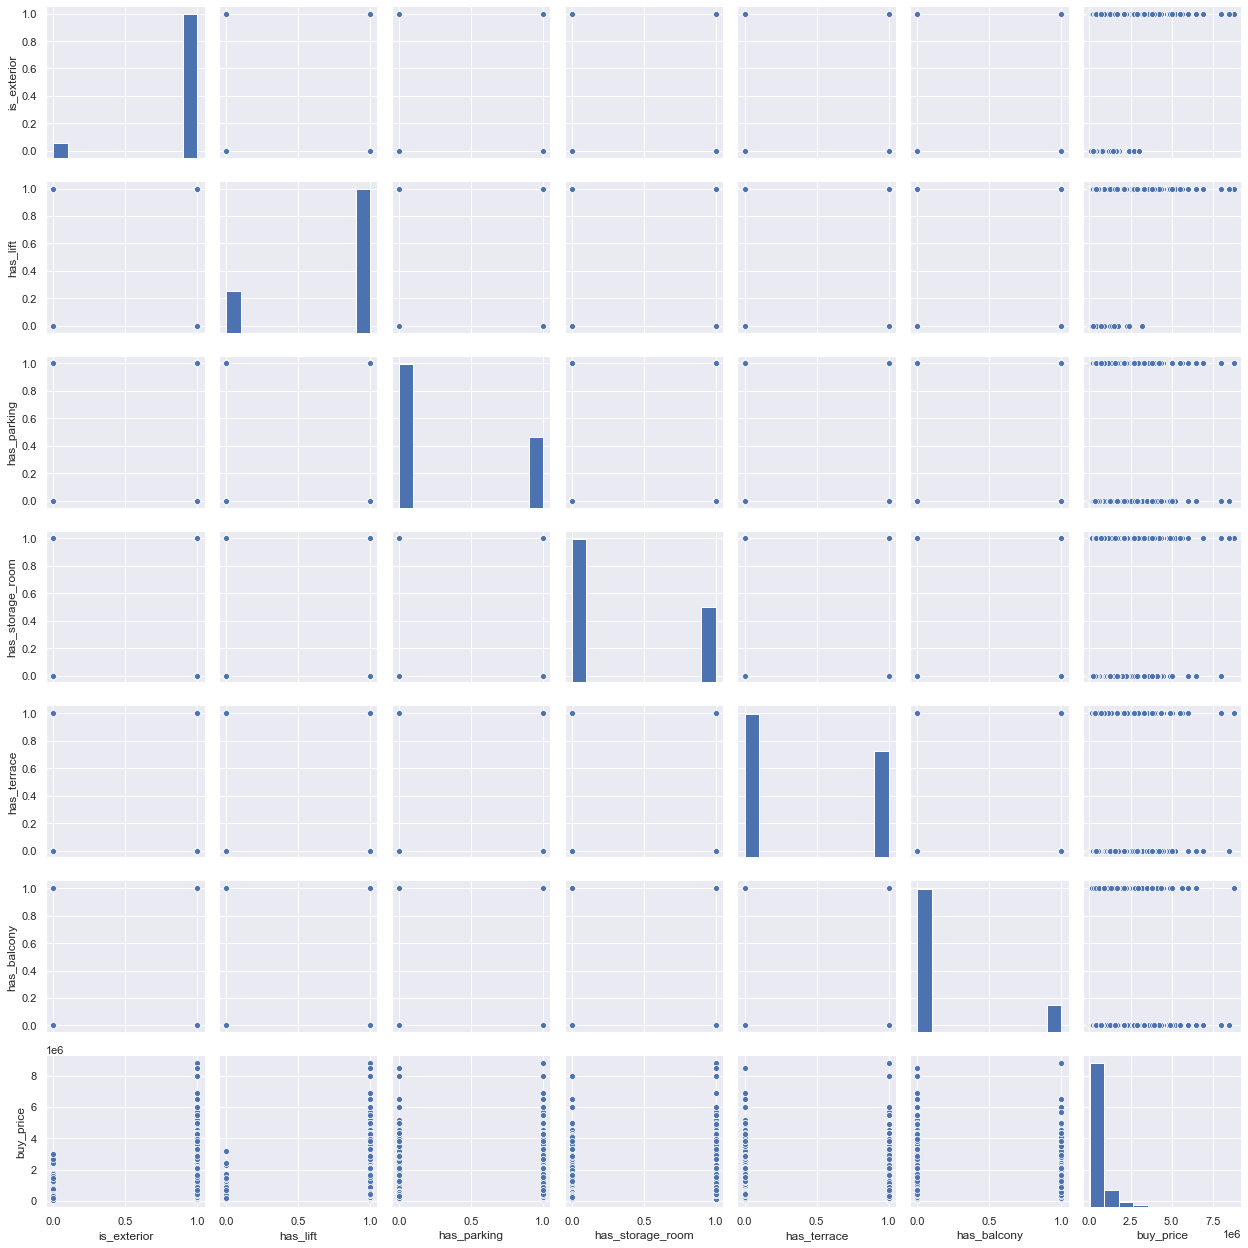

In [15]:
d_analysis2 = data[["is_exterior", "has_lift", 'has_parking', 'has_storage_room', 'has_terrace', 
                    'has_balcony', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis2)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


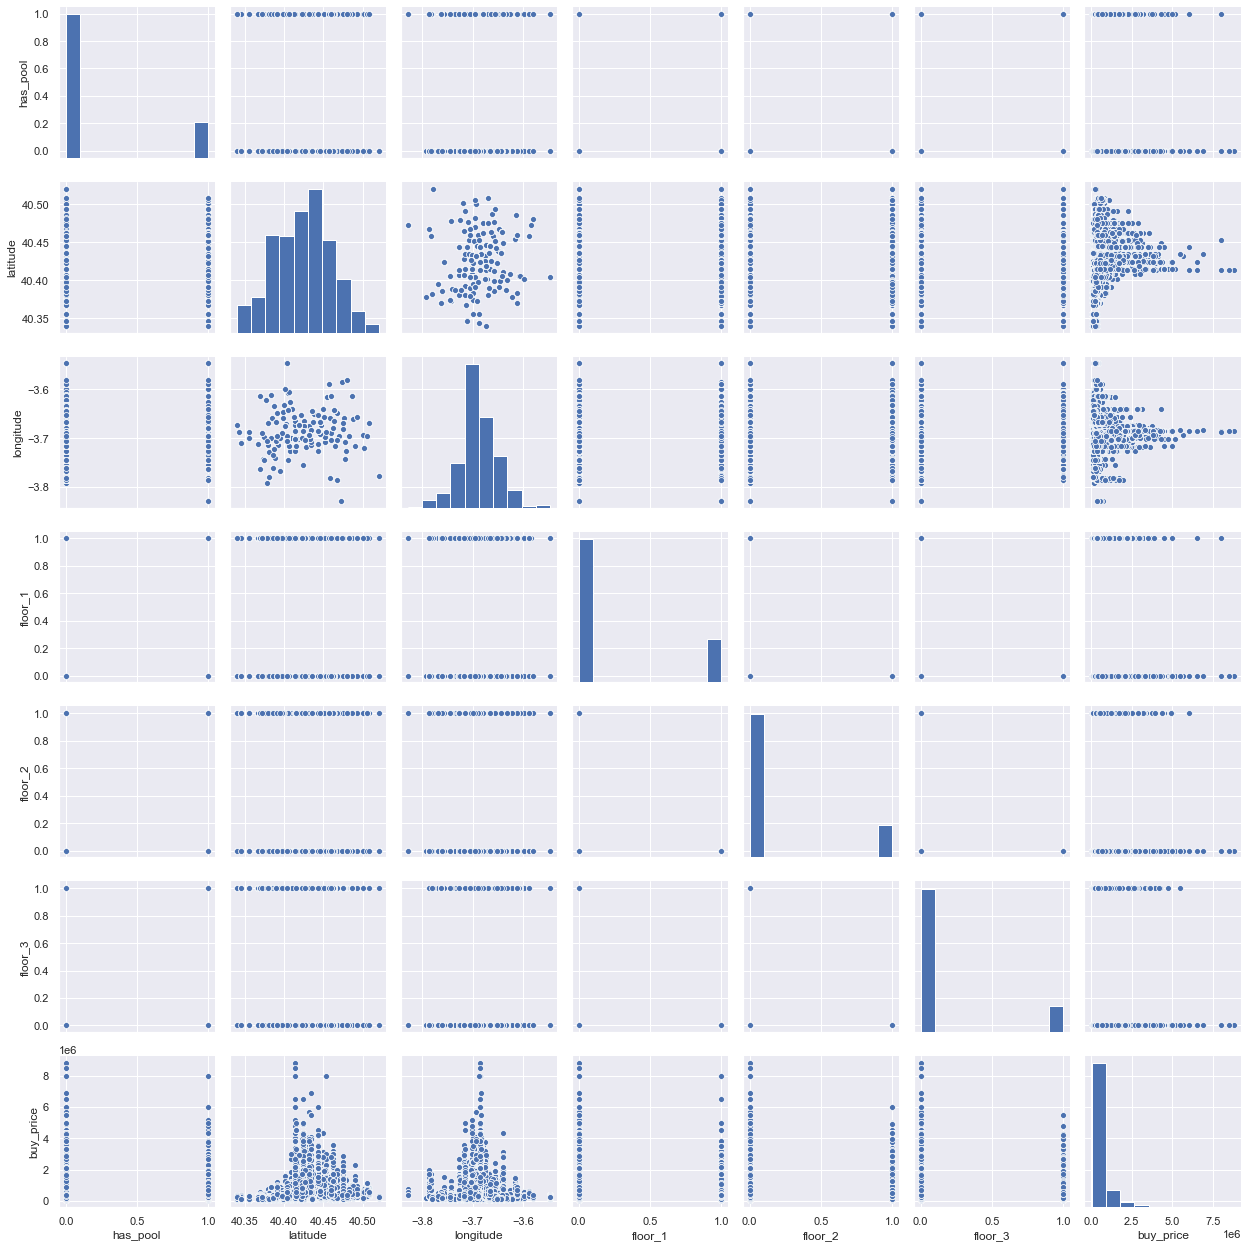

In [16]:
d_analysis3 = data[['has_pool', 'latitude', 'longitude', 'floor_1', 'floor_2','floor_3', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis3)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


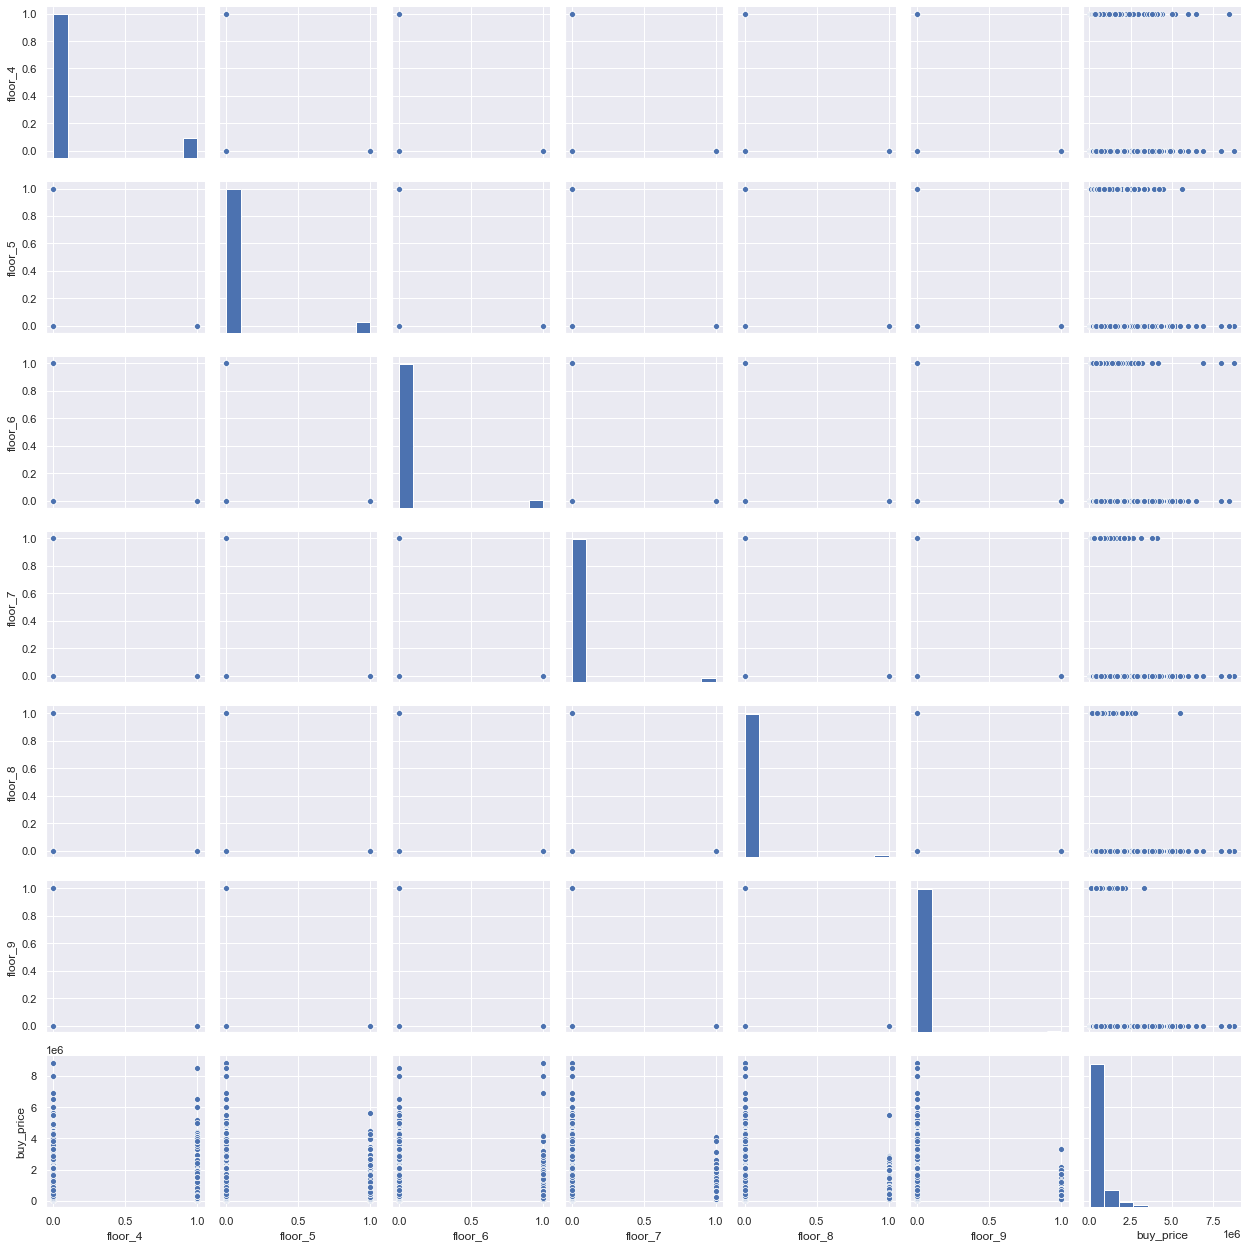

In [17]:
d_analysis4 = data[['floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8','floor_9', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis4)
plt.tight_layout()

/usr/local/lib/python3.8/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


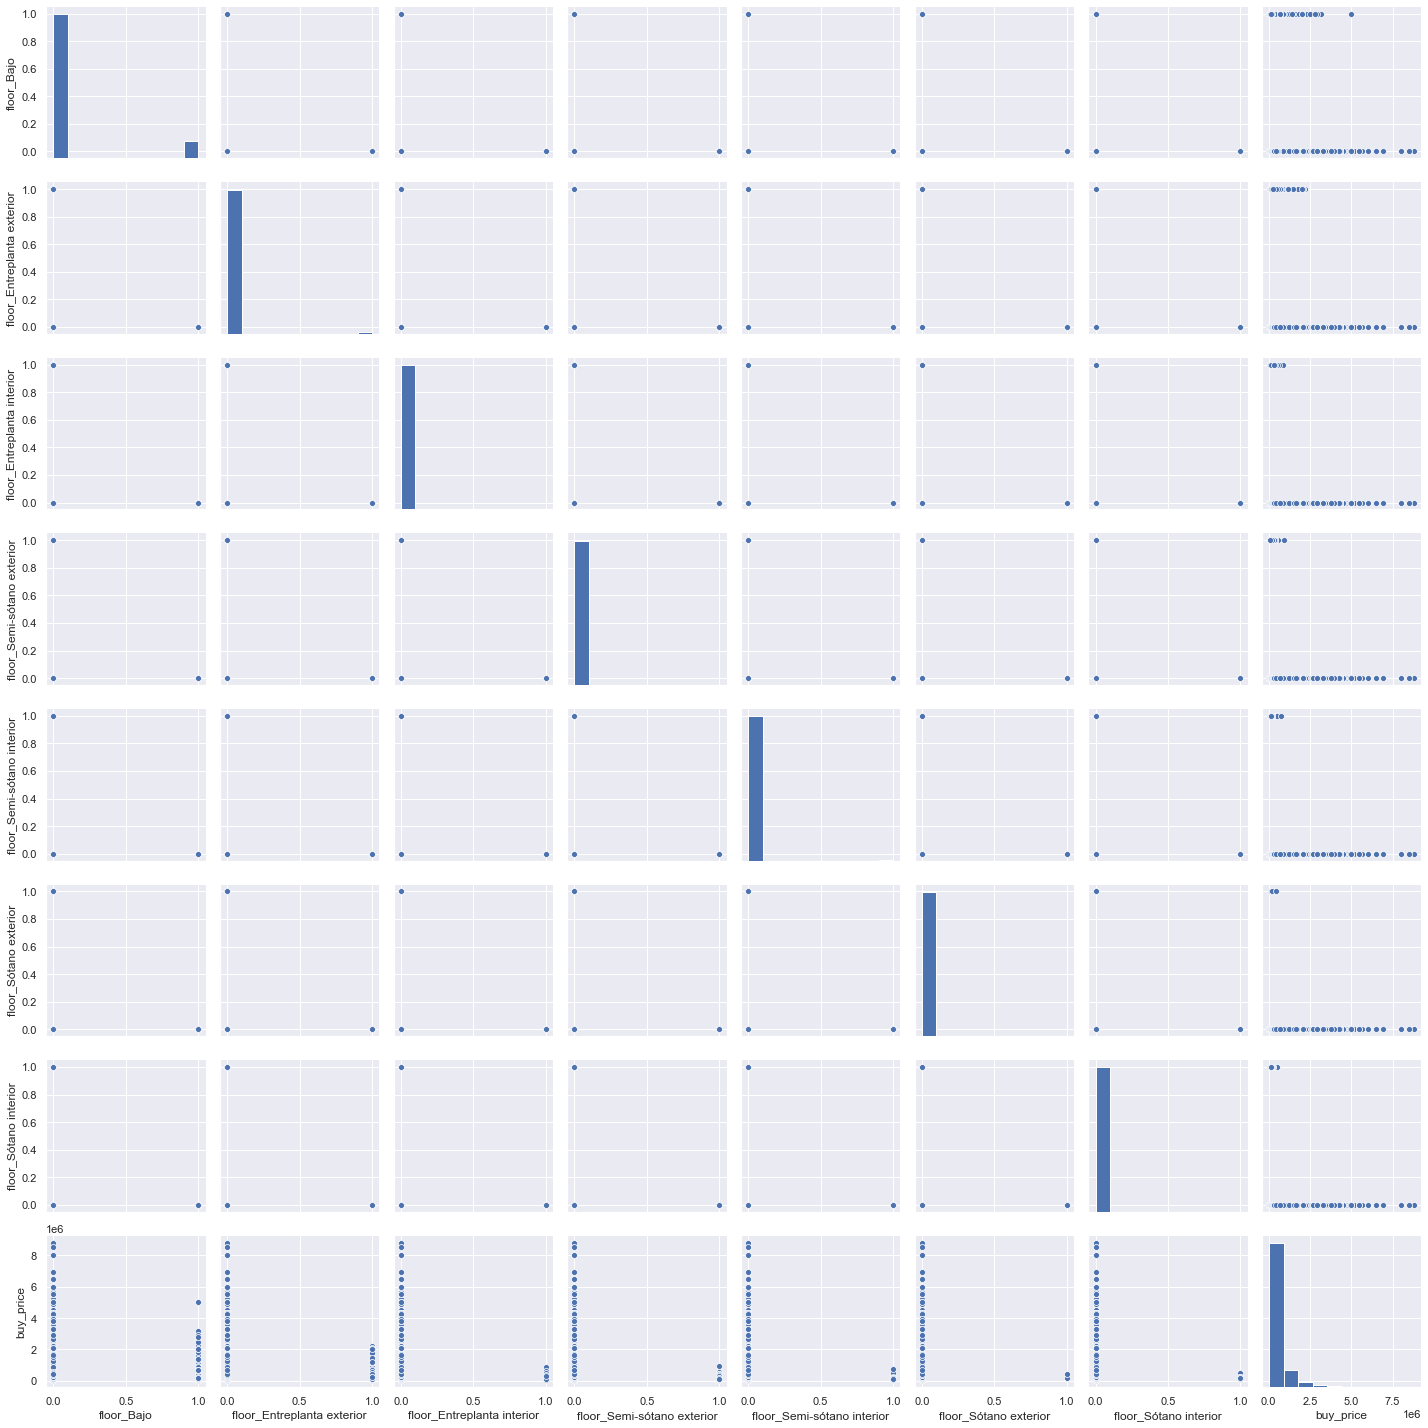

In [18]:
d_analysis5 = data[['floor_Bajo', 'floor_Entreplanta exterior','floor_Entreplanta interior', 
                    'floor_Semi-sótano exterior','floor_Semi-sótano interior', 'floor_Sótano exterior',
                    'floor_Sótano interior', 'buy_price']]

sns.pairplot(data, size=2.5, vars=d_analysis5)
plt.tight_layout()

In [ ]:
# Aquí comentarios con respecto a los gráficos anteriores.

### Una vez tenemos todos los datos correctamente organizados, vamos a proceder a entrenar los datos.
### En este caso nuestro GroundTruth es buy price, por lo que vamos a proceder a realizar el estudio.

In [20]:
columnas = [col for col in data.columns if col not in ["buy_price"]]
X = data[columnas]
y = data["buy_price"]

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

### Vamos a descubrir cual es el modelo que mejor funciona

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [23]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [24]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.844
ME 3850000.0
MAE 91221.46
RMSE 231166.444
R2 0.844
-------RandomForest-------
EVS 0.916
ME 3802380.0
MAE 70594.81
RMSE 169425.834
R2 0.916
-------ExtraTrees-------
EVS 0.908
ME 3679290.0
MAE 74755.228
RMSE 177577.468
R2 0.908
-------GradientBoosting-------
EVS 0.891
ME 3461441.829
MAE 98437.625
RMSE 192770.557
R2 0.891
-------HistGradientBoosting-------
EVS 0.903
ME 3260467.793
MAE 85441.668
RMSE 182465.126
R2 0.903
-------Voting-------
EVS 0.917
ME 3616755.0
MAE 70367.8
RMSE 168495.882
R2 0.917


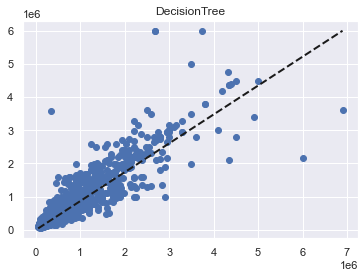

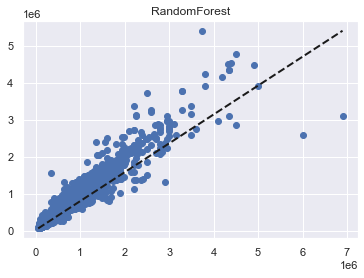

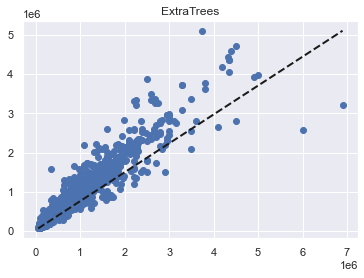

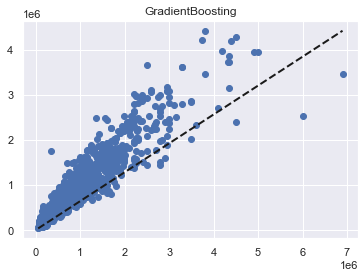

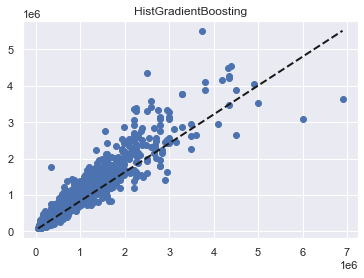

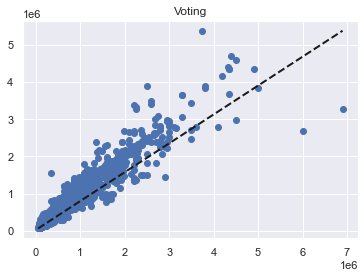

In [25]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [26]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.6838182809503526
RandomForest accuracy0.8291703714316165
ExtraTrees accuracy0.7974072399534655
GradientBoosting accuracy0.7109867491690945
HistGradientBoosting accuracy0.8241732567709427
Voting accuracy0.8264585615088924


## ------------------------------  Prueba con otras features.  ------------------------------------------

In [27]:
columnas = [col for col in data.columns if col not in ["has_pool","has_terrace","has_balcony","buy_price"]]
X = data[columnas]
y = data["buy_price"]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [29]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [30]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.867
ME 3400000.0
MAE 88644.823
RMSE 213426.754
R2 0.867
-------RandomForest-------
EVS 0.914
ME 3758910.0
MAE 71205.539
RMSE 171578.685
R2 0.914
-------ExtraTrees-------
EVS 0.91
ME 3783362.0
MAE 72542.29
RMSE 175340.793
R2 0.91
-------GradientBoosting-------
EVS 0.891
ME 3470854.496
MAE 98919.362
RMSE 192622.252
R2 0.891
-------HistGradientBoosting-------
EVS 0.903
ME 3361808.237
MAE 85343.645
RMSE 182248.326
R2 0.903
-------Voting-------
EVS 0.918
ME 3535040.0
MAE 70250.495
RMSE 167163.394
R2 0.918


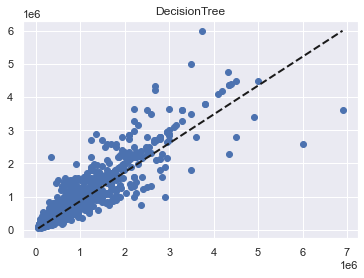

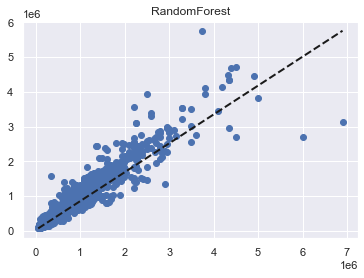

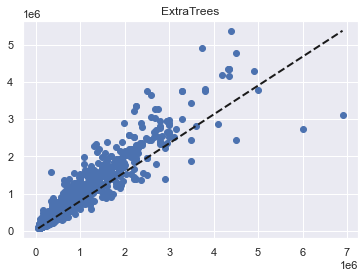

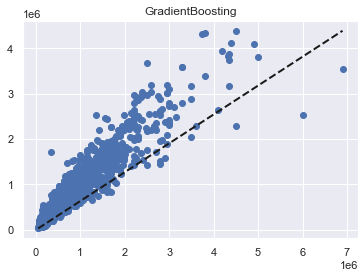

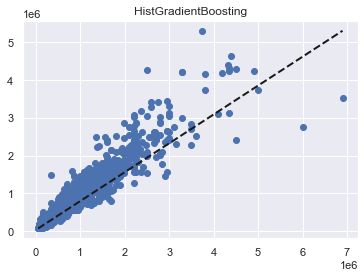

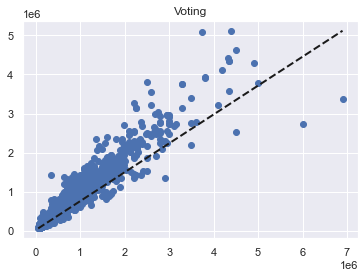

In [32]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [33]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.676198127382375
RandomForest accuracy0.8293473723523863
ExtraTrees accuracy0.814853042651572
GradientBoosting accuracy0.7200661615822804
HistGradientBoosting accuracy0.8409713782174155
Voting accuracy0.8341406775763425


## Pruebas eliminando viviendas con precios por encima de 1.000.000€

In [80]:
data1 = pd.read_csv("../outputs/clean_houses.csv")

In [81]:
data1.rename(columns={"Unnamed: 0":"index"},inplace=True)
data1.set_index("index", inplace=True)
data1.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
index,,,,,,,,,,,,,,,,,,,
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [36]:
data1[data1.buy_price>2000000].count()

neighborhood_id       645
house_type_id         645
is_renewal_needed     645
is_new_development    645
sq_mt_built           645
n_rooms               645
n_bathrooms           645
floor                 645
is_exterior           645
has_lift              645
has_parking           645
has_storage_room      645
has_terrace           645
has_balcony           645
has_pool              645
buy_price             645
buy_price_by_area     645
latitude              645
longitude             645
dtype: int64

In [37]:
data1 = data1.drop(data1[data1["buy_price"]>1000000].index)

In [38]:
data1

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
index,,,,,,,,,,,,,,,,,,,
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17393,"Campo de las Naciones-Corralejos, Barajas(Madrid)",HouseType 1: Pisos,False,False,88.0,2,2.0,1,True,True,True,True,False,False,True,360000,4420,40.459749,-3.612738
17394,"Campo de las Naciones-Corralejos, Barajas(Madrid)",HouseType 1: Pisos,False,False,99.0,2,2.0,1,True,True,True,True,False,False,True,349000,3525,40.459749,-3.612738
17395,"Casco Histórico de Barajas, Barajas(Madrid)",HouseType 5: Áticos,False,False,78.0,2,2.0,4,True,True,True,True,False,False,False,350000,4487,40.479840,-3.580251


In [39]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data1[column] = le.fit_transform(data1[column])
    return data1[column]

In [40]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

index
0        0
1        0
2        0
3        0
4        1
        ..
17393    1
17394    1
17395    0
17396    1
17397    1
Name: has_pool, Length: 15206, dtype: int64

In [41]:
# Aplicamos ahora get_dummies a la columna floor.

data1 = pd.get_dummies(data1, columns = ["floor"])

In [42]:
data1.columns

Index(['neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude', 'floor_1', 'floor_2',
       'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
       'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior'],
      dtype='object')

In [43]:
data1 = data1[['latitude', 'longitude', 'house_type_id', 'sq_mt_built', 'n_rooms', 'n_bathrooms',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'floor_1', 'floor_2',
       'floor_3', 'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8',
       'floor_9', 'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior', 'buy_price']]

In [44]:
columnas = [col for col in data1.columns if col not in ["buy_price"]]
X = data1[columnas]
y = data1["buy_price"]

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [46]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [47]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.873
ME 565000.0
MAE 51974.979
RMSE 84717.352
R2 0.873
-------RandomForest-------
EVS 0.928
ME 482101.23
MAE 41985.974
RMSE 63984.126
R2 0.928
-------ExtraTrees-------
EVS 0.926
ME 373042.5
MAE 42241.983
RMSE 64820.344
R2 0.926
-------GradientBoosting-------
EVS 0.895
ME 411621.46
MAE 54526.814
RMSE 77136.564
R2 0.895
-------HistGradientBoosting-------
EVS 0.923
ME 354296.985
MAE 45710.55
RMSE 65870.867
R2 0.923
-------Voting-------
EVS 0.931
ME 401003.7
MAE 41007.391
RMSE 62635.78
R2 0.931


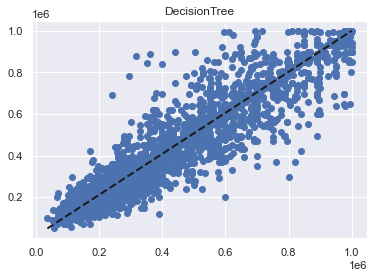

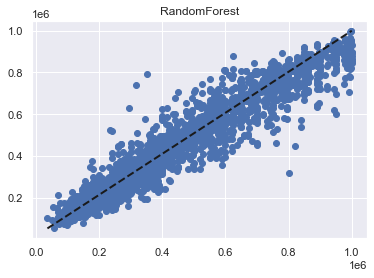

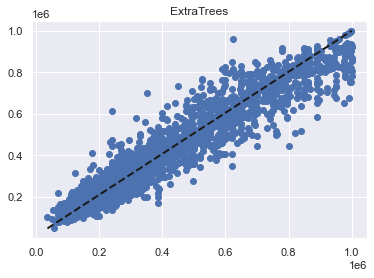

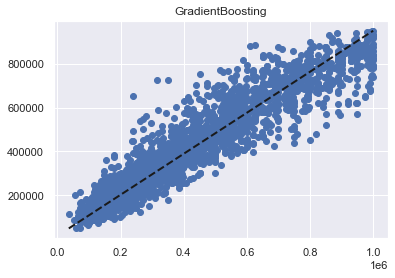

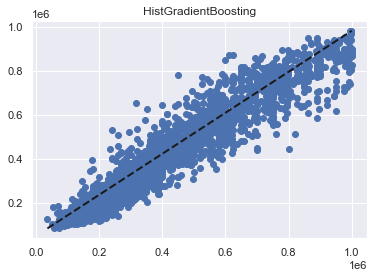

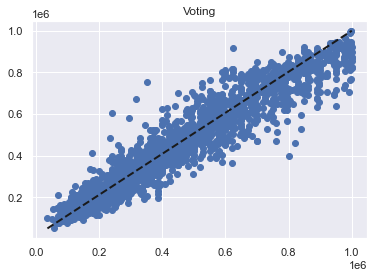

In [48]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [49]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.6479799454802573
RandomForest accuracy0.7949684437461261
ExtraTrees accuracy0.8041413923638112
GradientBoosting accuracy0.7713950932449386
HistGradientBoosting accuracy0.8405639268605001
Voting accuracy0.8110744272856187


## Pruebas según heatmap

In [50]:
data2 = pd.read_csv("../outputs/clean_houses.csv")

In [51]:
data2.rename(columns={"Unnamed: 0":"index"},inplace=True)
data2.set_index("index", inplace=True)
data2.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
index,,,,,,,,,,,,,,,,,,,
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [52]:
def transf(column):

    le = preprocessing.LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    return data2[column]

In [53]:
#transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

index
0        0
1        0
2        0
3        0
4        1
        ..
17393    1
17394    1
17395    0
17396    1
17397    1
Name: has_pool, Length: 17398, dtype: int64

In [55]:
data2 = data2.drop(data2[data2["buy_price"]>1000000].index)
data2 = data2.drop(data2[data2["sq_mt_built"]>300].index)
data2 = data2.drop(data2[data2["n_rooms"]>5].index)
data2 = data2.drop(data2[data2["n_bathrooms"]>5].index)

In [56]:
data2.reset_index()
data2

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
index,,,,,,,,,,,,,,,,,,,
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,0,0,64.0,2,1.0,3,1,0,0,0,0,0,0,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,1,0,70.0,3,1.0,4,1,1,0,0,1,0,0,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,0,0,94.0,2,2.0,1,1,1,0,1,0,0,0,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,0,0,64.0,2,1.0,Bajo,1,1,0,1,0,0,0,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,0,0,108.0,2,2.0,4,1,1,1,1,0,0,1,260000,2407,40.355841,-3.688399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17393,"Campo de las Naciones-Corralejos, Barajas(Madrid)",HouseType 1: Pisos,0,0,88.0,2,2.0,1,1,1,1,1,0,0,1,360000,4420,40.459749,-3.612738
17394,"Campo de las Naciones-Corralejos, Barajas(Madrid)",HouseType 1: Pisos,0,0,99.0,2,2.0,1,1,1,1,1,0,0,1,349000,3525,40.459749,-3.612738
17395,"Casco Histórico de Barajas, Barajas(Madrid)",HouseType 5: Áticos,0,0,78.0,2,2.0,4,1,1,1,1,0,0,0,350000,4487,40.479840,-3.580251


In [57]:
# Aplicamos ahora get_dummies a la columna floor.

data2 = pd.get_dummies(data2, columns = ["house_type_id", "floor"])

In [58]:
data2.columns

Index(['neighborhood_id', 'is_renewal_needed', 'is_new_development',
       'sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exterior', 'has_lift',
       'has_parking', 'has_storage_room', 'has_terrace', 'has_balcony',
       'has_pool', 'buy_price', 'buy_price_by_area', 'latitude', 'longitude',
       'house_type_id_HouseType 1: Pisos', 'house_type_id_HouseType 4: Dúplex',
       'house_type_id_HouseType 5: Áticos', 'floor_1', 'floor_2', 'floor_3',
       'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8', 'floor_9',
       'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior'],
      dtype='object')

In [59]:
data2 = data2[['is_renewal_needed', 'is_new_development',
       'sq_mt_built', 'n_rooms', 'n_bathrooms', 'is_exterior', 'has_lift',
       'has_parking', 'has_storage_room', 'has_terrace', 'has_balcony',
       'has_pool', 'latitude', 'longitude',
       'house_type_id_HouseType 1: Pisos', 'house_type_id_HouseType 4: Dúplex',
       'house_type_id_HouseType 5: Áticos', 'floor_1', 'floor_2', 'floor_3',
       'floor_4', 'floor_5', 'floor_6', 'floor_7', 'floor_8', 'floor_9',
       'floor_Bajo', 'floor_Entreplanta exterior',
       'floor_Entreplanta interior', 'floor_Semi-sótano exterior',
       'floor_Semi-sótano interior', 'floor_Sótano exterior',
       'floor_Sótano interior', 'buy_price']]

In [60]:
columnas = [col for col in data2.columns if col not in ["buy_price"]]
X = data2[columnas]
y = data2["buy_price"]

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [62]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor
from sklearn.metrics import  explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

In [63]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(max_depth= 60),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [64]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.847
ME 560000.0
MAE 54612.924
RMSE 90432.894
R2 0.847
-------RandomForest-------
EVS 0.925
ME 374562.0
MAE 41650.077
RMSE 63295.387
R2 0.925
-------ExtraTrees-------
EVS 0.919
ME 405741.0
MAE 42297.293
RMSE 65634.917
R2 0.919
-------GradientBoosting-------
EVS 0.884
ME 430112.022
MAE 56211.445
RMSE 78668.199
R2 0.884
-------HistGradientBoosting-------
EVS 0.921
ME 361955.218
MAE 45247.779
RMSE 64888.988
R2 0.921
-------Voting-------
EVS 0.927
ME 372715.51
MAE 40807.068
RMSE 62399.29
R2 0.927


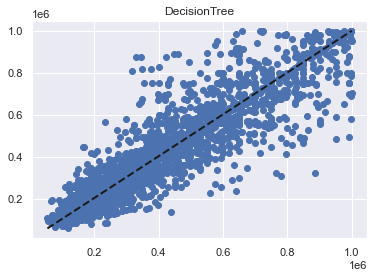

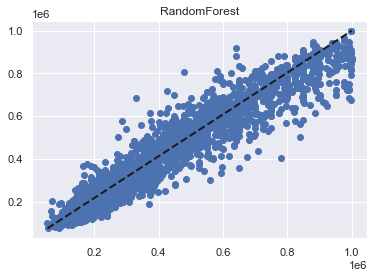

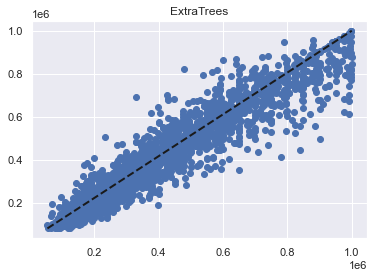

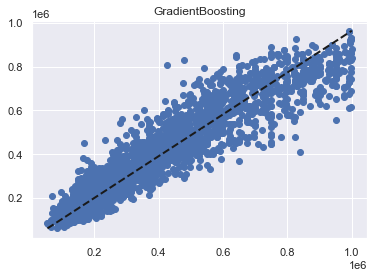

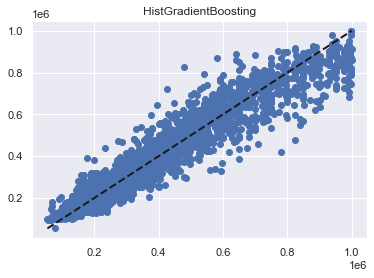

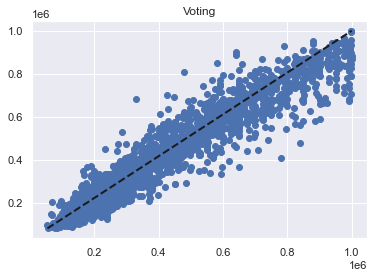

In [65]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [66]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.6437559741346568
RandomForest accuracy0.796248865181003
ExtraTrees accuracy0.7878768600624164
GradientBoosting accuracy0.748722404816293
HistGradientBoosting accuracy0.8381056351380035
Voting accuracy0.8053443365910541


## KNeighbors

In [68]:
from sklearn.neighbors import KNeighborsRegressor

In [70]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [71]:
print("EVS", round(explained_variance_score(y_test,y_pred),3))
print("ME", round(max_error(y_test,y_pred),3))
print("MAE", round(mean_absolute_error(y_test,y_pred),3))
print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
print("R2", round(r2_score(y_test,y_pred),3))

EVS 0.724
ME 678057.0
MAE 85181.702
RMSE 121323.467
R2 0.724


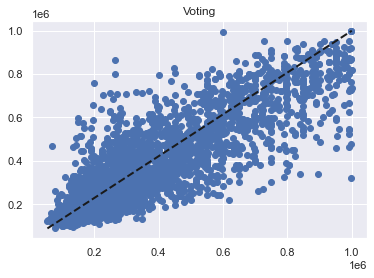

In [73]:
plt.figure()
plt.title(name)
plt.scatter(y_test,y_pred)
plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

## SOLO PISOS

In [187]:
pisos = pd.read_csv("../outputs/clean_houses.csv")

In [188]:
pisos.rename(columns={"Unnamed: 0":"index"},inplace=True)
pisos.set_index("index", inplace=True)
pisos.head()

,neighborhood_id,house_type_id,is_renewal_needed,is_new_development,sq_mt_built,n_rooms,n_bathrooms,floor,is_exterior,has_lift,has_parking,has_storage_room,has_terrace,has_balcony,has_pool,buy_price,buy_price_by_area,latitude,longitude
index,,,,,,,,,,,,,,,,,,,
0,"San Cristóbal, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,3,True,False,False,False,False,False,False,85000,1328,40.343263,-3.688352
1,"Los Ángeles, Villaverde(Madrid)",HouseType 1: Pisos,True,False,70.0,3,1.0,4,True,True,False,False,True,False,False,129900,1856,40.355109,-3.700105
2,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,94.0,2,2.0,1,True,True,False,True,False,False,False,144247,1535,40.345539,-3.710970
3,"San Andrés, Villaverde(Madrid)",HouseType 1: Pisos,False,False,64.0,2,1.0,Bajo,True,True,False,True,False,False,False,109900,1717,40.345539,-3.710970
4,"Los Rosales, Villaverde(Madrid)",HouseType 1: Pisos,False,False,108.0,2,2.0,4,True,True,True,True,False,False,True,260000,2407,40.355841,-3.688399


In [189]:
pisos.house_type_id.value_counts()

HouseType 1: Pisos     15858
HouseType 5: Áticos      910
HouseType 4: Dúplex      630
Name: house_type_id, dtype: int64

In [190]:
pisos = pisos.drop(pisos[pisos["house_type_id"]=="HouseType 4: Dúplex"].index)
pisos = pisos.drop(pisos[pisos["house_type_id"]=="HouseType 5: Áticos"].index)

In [191]:
def transf(column):

    le = preprocessing.LabelEncoder()
    pisos[column] = le.fit_transform(pisos[column])
    return pisos[column]

In [192]:
transf("house_type_id")
transf("is_renewal_needed")
transf("is_new_development")
transf("floor")
transf("is_exterior")
transf("has_lift")
transf("has_parking")
transf("has_storage_room")
transf("has_terrace")
transf("has_balcony")
transf("has_pool")

index
0        0
1        0
2        0
3        0
4        1
        ..
17392    1
17393    1
17394    1
17396    1
17397    1
Name: has_pool, Length: 15858, dtype: int64

In [193]:
pisos = pisos.drop(pisos[pisos["buy_price"]>1000000].index)
pisos = pisos.drop(pisos[pisos["sq_mt_built"]>300].index)
pisos = pisos.drop(pisos[pisos["n_rooms"]>5].index)
pisos = pisos.drop(pisos[pisos["n_bathrooms"]>5].index)

In [194]:
#pisos = pd.get_dummies(pisos, columns = ["floor"])

In [195]:
pisos.columns

Index(['neighborhood_id', 'house_type_id', 'is_renewal_needed',
       'is_new_development', 'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor',
       'is_exterior', 'has_lift', 'has_parking', 'has_storage_room',
       'has_terrace', 'has_balcony', 'has_pool', 'buy_price',
       'buy_price_by_area', 'latitude', 'longitude'],
      dtype='object')

In [196]:
pisos = pisos[['house_type_id', 'is_renewal_needed','is_new_development', 
               'sq_mt_built', 'n_rooms', 'n_bathrooms', 'floor', 'is_exterior',
               'has_lift', 'has_parking', 'has_storage_room', 'has_terrace',
               'has_balcony', 'has_pool', 'latitude', 'longitude', 'buy_price']]

In [197]:
columnas = [col for col in pisos.columns if col not in ["buy_price"]]
X = pisos[columnas]
y = pisos["buy_price"]

In [198]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=7)

In [199]:
models = {
    "DecisionTree" : DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(max_depth= 60),
    "ExtraTrees" : ExtraTreesRegressor(),
    "GradientBoosting" : GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor(),
    "Voting": VotingRegressor(
        [('etr', ExtraTreesRegressor()),
         ('rf', RandomForestRegressor())]
    )
}

In [200]:
for name, model in models.items():
    print(f"Entrenando {name}")
    model.fit(X_train, y_train)
print("Proceso terminado ")

Entrenando DecisionTree
Entrenando RandomForest
Entrenando ExtraTrees
Entrenando GradientBoosting
Entrenando HistGradientBoosting
Entrenando Voting
Proceso terminado 


-------DecisionTree-------
EVS 0.864
ME 614000.0
MAE 50656.166
RMSE 84491.597
R2 0.864
-------RandomForest-------
EVS 0.929
ME 411279.31
MAE 39271.707
RMSE 61201.187
R2 0.929
-------ExtraTrees-------
EVS 0.923
ME 536435.0
MAE 39595.094
RMSE 63391.008
R2 0.923
-------GradientBoosting-------
EVS 0.896
ME 388087.347
MAE 52371.435
RMSE 73769.793
R2 0.896
-------HistGradientBoosting-------
EVS 0.924
ME 422037.049
MAE 42943.024
RMSE 63141.434
R2 0.924
-------Voting-------
EVS 0.93
ME 448978.67
MAE 38383.736
RMSE 60431.852
R2 0.93


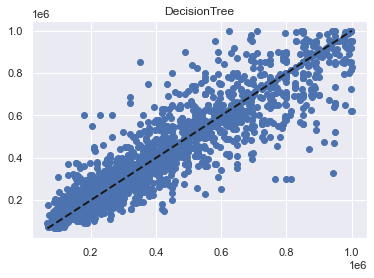

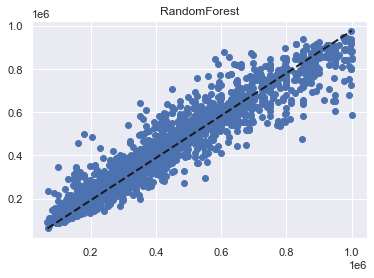

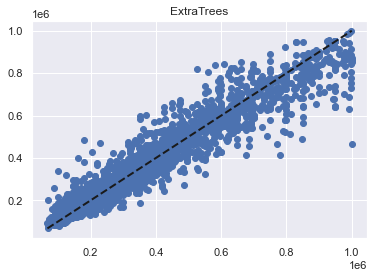

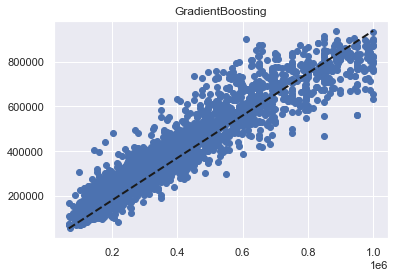

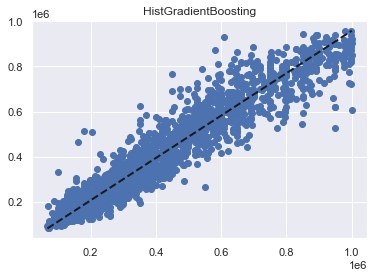

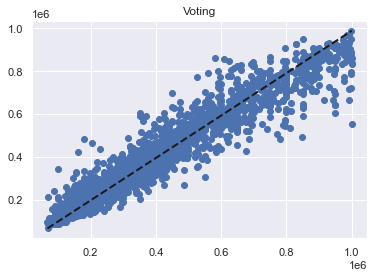

In [201]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"-------{name}-------")
    print("EVS", round(explained_variance_score(y_test,y_pred),3))
    print("ME", round(max_error(y_test,y_pred),3))
    print("MAE", round(mean_absolute_error(y_test,y_pred),3))
    print("RMSE", round(np.sqrt(mean_squared_error(y_test,y_pred)),3))
    print("R2", round(r2_score(y_test,y_pred),3))
    plt.figure()
    plt.title(name)
    plt.scatter(y_test,y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_pred.min(), y_pred.max()], 'k--', lw=2)

In [171]:
for name, model in models.items():
    scores = cross_val_score(model,X,y, cv=10)
    print(f"{name} accuracy{np.mean(scores)}")

DecisionTree accuracy0.6582294196159487
RandomForest accuracy0.8116117833792418
ExtraTrees accuracy0.8024260336799373
GradientBoosting accuracy0.7769743543937577
HistGradientBoosting accuracy0.8437156850272037
Voting accuracy0.8219982777423361


## NEURAL NETWORK

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=200, random_state=1)

regr = MLPRegressor(random_state=1, max_iter=5000).fit(X_train, y_train)
regr.predict(X_test[:2])

regr.score(X_test, y_test)


In [ ]:
parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
#Reducimos para hacer la prueba con diferentes n_estimators
params = {
     'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(RandomForestRegressor(),params,verbose=1)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_params_)